Project: Deep Learning for Image Classification

Till ditt slutprojekt i Deep Learning-kursen kommer du att ha möjlighet att söka
djupinlärningstekniker till en utmanande bildklassificeringsuppgift. Detta projekt kommer att tillåta
dig att visa din förståelse för djupa neurala nätverk, konvolutionella neurala
nätverk (CNN) och överföringsinlärning för bildklassificering.

Vi delar project i 2 delar:

1. Data preprocessing och data analys
2. Modellering och utvärdering med Machine Learning och Deep Learning

Till slut jamförar vi och printa ut en rapport.

FÖRSTA DELEN AV KODEN

In [ ]:
# importering av bibliotek som behövs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys
import os

In [ ]:
# spara vägen till filen i en variabel
path = sys.path[0]

In [20]:
# läsa in data från csv-fil och skapa en dataframe
df = pd.read_excel(path +'/data/dataset/dataset.xlsx', sheet_name='Pistachio_Dataset')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2148 entries, 0 to 2147
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           2148 non-null   int64  
 1   PERIMETER      2148 non-null   float64
 2   MAJOR_AXIS     2148 non-null   float64
 3   MINOR_AXIS     2148 non-null   float64
 4   ECCENTRICITY   2148 non-null   float64
 5   EQDIASQ        2148 non-null   float64
 6   SOLIDITY       2148 non-null   float64
 7   CONVEX_AREA    2148 non-null   int64  
 8   EXTENT         2148 non-null   float64
 9   ASPECT_RATIO   2148 non-null   float64
 10  ROUNDNESS      2148 non-null   float64
 11  COMPACTNESS    2148 non-null   float64
 12  SHAPEFACTOR_1  2148 non-null   float64
 13  SHAPEFACTOR_2  2148 non-null   float64
 14  SHAPEFACTOR_3  2148 non-null   float64
 15  SHAPEFACTOR_4  2148 non-null   float64
 16  Class          2148 non-null   object 
dtypes: float64(14), int64(2), object(1)
memory usage: 30

In [22]:
# printa ut första 5 raderna i datasetena
df.head()


,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,Class
0,63391,1568.405,390.3396,236.7461,0.7951,284.0984,0.8665,73160,0.6394,1.6488,0.3238,0.7278,0.0062,0.0037,0.5297,0.8734,Kirmizi_Pistachio
1,68358,1942.187,410.8594,234.7525,0.8207,295.0188,0.8765,77991,0.6772,1.7502,0.2277,0.7181,0.0060,0.0034,0.5156,0.9024,Kirmizi_Pistachio
2,73589,1246.538,452.3630,220.5547,0.8731,306.0987,0.9172,80234,0.7127,2.0510,0.5951,0.6767,0.0061,0.0030,0.4579,0.9391,Kirmizi_Pistachio
3,71106,1445.261,429.5291,216.0765,0.8643,300.8903,0.9589,74153,0.7028,1.9879,0.4278,0.7005,0.0060,0.0030,0.4907,0.9755,Kirmizi_Pistachio
4,80087,1251.524,469.3783,220.9344,0.8823,319.3273,0.9657,82929,0.7459,2.1245,0.6425,0.6803,0.0059,0.0028,0.4628,0.9833,Kirmizi_Pistachio


In [27]:
print('Klasserna är:', df['Class'].unique())

Klasserna är: ['Kirmizi_Pistachio' 'Siit_Pistachio']


original shape:    (2148, 16)
transformed shape: (2148, 2)


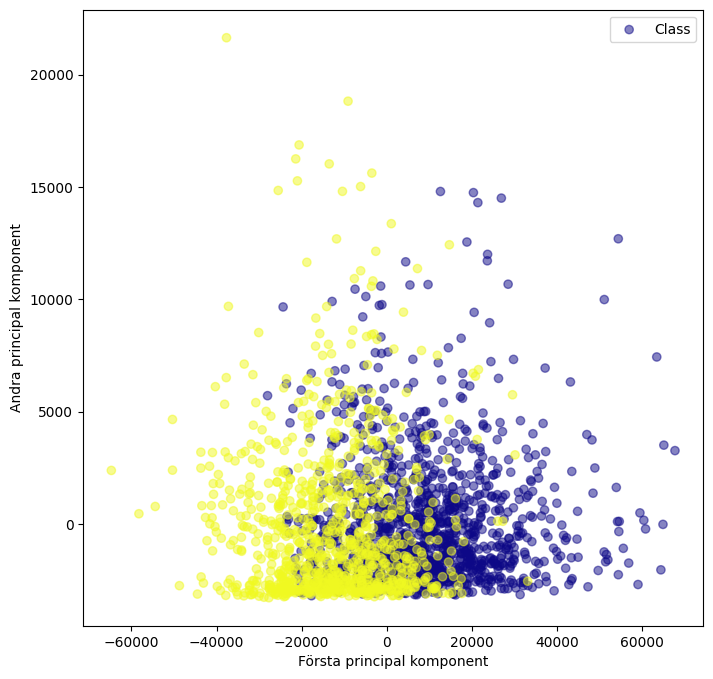

In [34]:
# vi kan prova att köra en PCA på datan för att se om vi kan minska antalet features
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

X = df.drop('Class', axis=1)
colors = df['Class'].replace(df['Class'].unique(),[0,1])

# träna PCA
pca.fit(X)

# transformera data
X_pca = pca.transform(X)

# kolla shape
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

# plotta PCA
plt.figure(figsize=(8,8))
plt.scatter(x=X_pca[:,0], y=X_pca[:,1], c=colors, cmap='plasma', alpha=0.5, label='Class')
plt.xlabel('Första principal komponent')
plt.ylabel('Andra principal komponent')
plt.legend()
plt.show()

Från en PCA-analys, för att förenkla attributen, framkom det att pistagenötter inte kan delas upp exakt i två distinkta kluster.

ANDRA DELEN AV KODEN

 - Machine Learning

In [47]:
# Skapa variabler för att lagra data
X = df.drop('Class', axis=1)
y = df['Class'].replace(df['Class'].unique(),[0,1])

In [58]:
# vi provar att använda en övervakat lärande metod för att träna en modell som kan klassificera 
# pistagenötter. Vi använder en Logistik Regression.

# Importera bibliotek
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression()
logisticRegr.fit(X, y)
predictions = logisticRegr.predict(X)

# Beräkna noggrannheten och Loss
from sklearn.metrics import log_loss
print('Loss: ', log_loss(y, logisticRegr.predict_proba(X)))
print('Accuracy: ', logisticRegr.score(X, y))

# Beräkna precision, återkallande och F1-score
from sklearn.metrics import classification_report
print(classification_report(y, logisticRegr.predict(X)))

# Beräkna förvirringsmatrisen
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y, predictions))

Loss:  0.3230720151630863
Accuracy:  0.86731843575419
              precision    recall  f1-score   support

           0       0.87      0.90      0.89      1232
           1       0.86      0.82      0.84       916

    accuracy                           0.87      2148
   macro avg       0.87      0.86      0.86      2148
weighted avg       0.87      0.87      0.87      2148

[[1108  124]
 [ 161  755]]


ANDRA DELEN AV KODEN

 - Deep Learning

In [67]:
from keras.models import Sequential
from keras.layers import Dense
import warnings
warnings.filterwarnings('ignore')

model = Sequential()
model.add(Dense(8, input_dim=X.shape[1], activation='relu', name='input'))
model.add(Dense(12, activation='relu', name='hidden1'))
model.add(Dense(12, activation='relu', name='hidden2'))
model.add(Dense(12, activation='relu', name='hidden3'))
model.add(Dense(1, activation='sigmoid', name='output'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

history = model.fit(X, y, epochs=170, batch_size=10, verbose=0)

score = model.evaluate(X, y)
print('loss:', score[0])
print('accuracy:', score[1])

predictions_nn = model.predict(X)
predictions_nn = [1 if x > 0.5 else 0 for x in predictions_nn]

print(classification_report(y, predictions_nn))
print(confusion_matrix(y, predictions_nn))


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 8)                 136       
                                                                 
 hidden1 (Dense)             (None, 12)                108       
                                                                 
 hidden2 (Dense)             (None, 12)                156       
                                                                 
 hidden3 (Dense)             (None, 12)                156       
                                                                 
 output (Dense)              (None, 1)                 13        
                                                                 
Total params: 569 (2.22 KB)
Trainable params: 569 (2.22 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
68/68 [===========

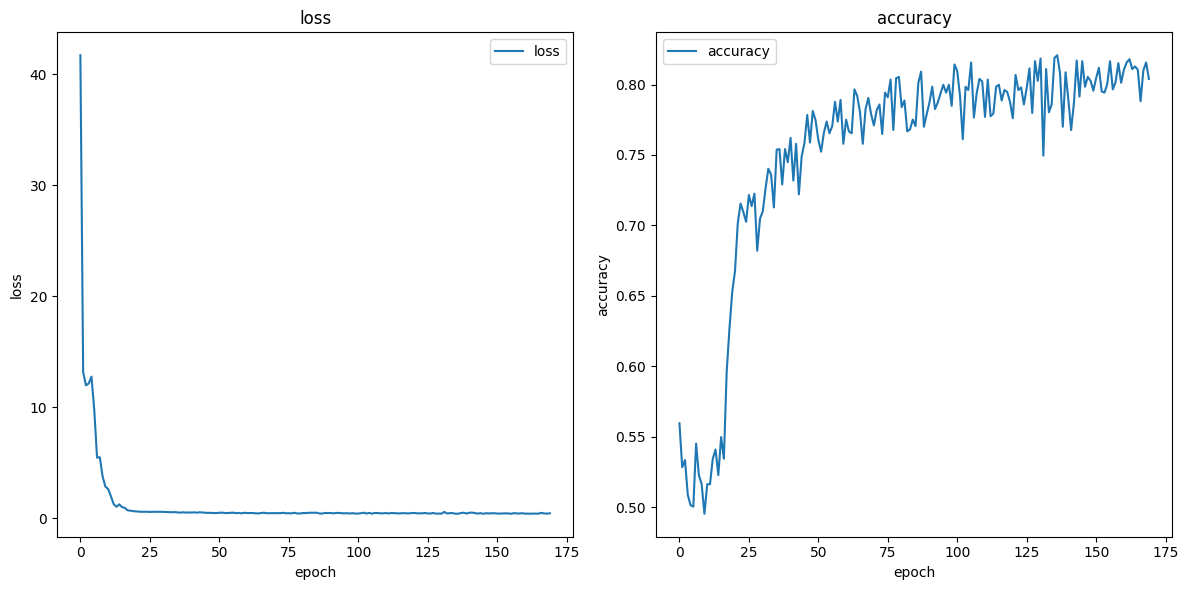

In [68]:
plt.figure(figsize=(12, 6), facecolor='white')

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('accuracy')
plt.legend()


plt.tight_layout()
plt.show()

In [70]:
# proviamo ad aprire una immagine con pillow e a convertirla in un array numpy
from PIL import Image

# apriamo l'immagine
img = Image.open(path+'/data/img/test.jpg')
img2arr = np.array(img)

In [73]:
img2arr.shape

(600, 600, 3)

In [ ]:
from keras import layers, models
from keras.losses import SparseCategoricalCrossentropy

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(600, 600, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.compile(optimizer='adam',
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


